In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'

filepaths = []
labels = []


folds = os.listdir(train_dir)

for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        
        filepaths.append(fpath)
        labels.append(fold)
        

train_df = pd.DataFrame(data={'filepaths':filepaths, 'labels':labels})
train_df

,filepaths,labels
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [3]:
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'

filepaths = []
labels = []


folds = os.listdir(test_dir)

for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    
    files = os.listdir(foldpath)
    for f in files:
        fpath = os.path.join(foldpath, f)
        
        filepaths.append(fpath)
        labels.append(fold)
ts_df = pd.DataFrame(data={'filepaths':filepaths, 'labels':labels})
ts_df

,filepaths,labels
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
valid_df, test_df = train_test_split(ts_df, test_size=0.5, random_state=42)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
gen = ImageDataGenerator(rescale=1./255)
train_gen = gen.flow_from_dataframe(
    train_df, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32
)

valid_gen = gen.flow_from_dataframe(
    valid_df, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32
)

test_gen = gen.flow_from_dataframe(
    test_df, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32
)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [7]:
class_indices = train_gen.class_indices
label_mapping = {v: k for k, v in class_indices.items()}

print("Class Indices Mapping:")
for index, label in label_mapping.items():
    print(f"Index: {index}, Label: {label}")

Class Indices Mapping:
Index: 0, Label: glioma
Index: 1, Label: meningioma
Index: 2, Label: notumor
Index: 3, Label: pituitary


In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax

def conv_block_2d(x, filters):
    x = layers.Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.4)(x)
    return x

def encoder_block_2d(x, filters):
    x = conv_block_2d(x, filters)
    skip_connection = x
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    return x, skip_connection

def decoder_block_2d(x, skip_connection, filters):
    x = layers.Conv2DTranspose(filters, kernel_size=(2, 2), strides=(2, 2), padding='same')(x)
    x = layers.concatenate([x, skip_connection], axis=-1)
    x = conv_block_2d(x, filters)
    return x

def unet_classification(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x1, skip1 = encoder_block_2d(inputs, 32)
    x2, skip2 = encoder_block_2d(x1, 256)
    bottleneck = conv_block_2d(x2, 512)

    x = layers.Flatten()(bottleneck)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

num_classes = 4  
model = unet_classification((224, 224, 3), num_classes)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_gen, 
                    validation_data=valid_gen, 
                    epochs=12)


Epoch 1/12


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729978775.804589     256 service.cc:145] XLA service 0x7af5cc003ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729978775.804639     256 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729978775.804643     256 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1729978840.468765     256 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.5873 - loss: 9.9862 - val_accuracy: 0.2305 - val_loss: 1.7737
Epoch 2/12
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 746ms/step - accuracy: 0.8183 - loss: 0.5080 - val_accuracy: 0.2275 - val_loss: 1.5015
Epoch 3/12
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 742ms/step - accuracy: 0.8727 - loss: 0.3752 - val_accuracy: 0.2855 - val_loss: 1.3769
Epoch 4/12
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 743ms/step - accuracy: 0.9122 - loss: 0.2584 - val_accuracy: 0.6244 - val_loss: 1.2671
Epoch 5/12
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 743ms/step - accuracy: 0.9460 - loss: 0.1551 - val_accuracy: 0.5405 - val_loss: 1.4492
Epoch 6/12
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 743ms/step - accuracy: 0.9040 - loss: 0.3808 - val_accuracy: 0.5588 - val_loss: 1.0887
Epoch 7/12
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 743ms/step - accuracy: 0.9710 - loss: 0.0977 - val_accuracy: 0.6092 - val_loss: 0.8770
Epoch 8/12
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 744ms/step - accuracy: 0.9760 - loss: 0.0659 

In [9]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 256)  │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 112, 112, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112, 112, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 512)    │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 1,245,784,558 (4.64 GB)

 Trainable params: 415,260,452 (1.55 GB)

 Non-trainable params: 3,200 (12.50 KB)

 Optimizer params: 830,520,906 (3.09 GB)

In [10]:
model.save('unet_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


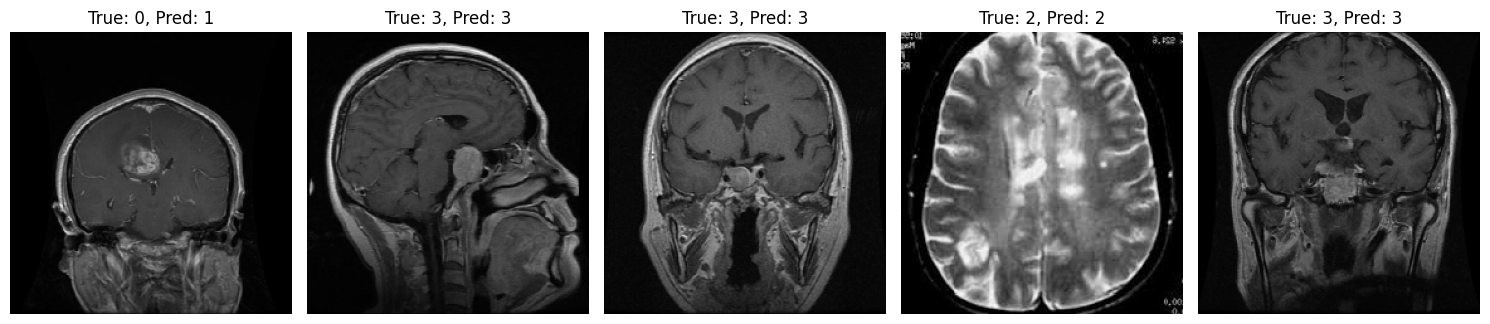

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, test_gen, num_images=5):
    # Get a batch of test data
    images, true_labels = next(test_gen)

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(true_labels, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_gen)
